<a href="https://www.kaggle.com/code/danish1987/diabates-analysis?scriptVersionId=139991812" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Summary of the Dataset

This dataset seems to contain information related to diabetes, with a focus on various health-related variables that could be associated with diabetes risk. The variables include:

- **Pregnancies**: The number of pregnancies an individual has had.
- **Glucose**: Glucose levels in the blood.
- **BloodPressure**: Blood pressure readings.
- **SkinThickness**: Thickness of a skinfold at a certain location on the body.
- **Insulin**: Levels of insulin in the blood.
- **BMI (Body Mass Index)**: A measure of body fat based on height and weight.
- **DiabetesPedigreeFunction**: A function that scores the likelihood of diabetes based on family history.
- **Age**: Age of the individuals.
- **Outcome**: A binary variable indicating the presence (1) or absence (0) of a diabetes outcome.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("../input/diabetes-dataset/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


- **Pregnancies (+0.22)**: Positive correlation. Higher number of pregnancies slightly increases diabetes likelihood.
- **Glucose (+0.47)**: Positive correlation. Higher glucose levels significantly indicate higher diabetes risk.
- **BloodPressure (+0.07)**: Positive correlation. Slight increase in blood pressure, slight increase in diabetes risk.
- **SkinThickness (+0.07)**: Positive correlation. Slight increase in skin thickness, slight increase in diabetes risk.
- **Insulin (+0.13)**: Positive correlation. Slight increase in insulin levels, slight increase in diabetes risk.
- **BMI (+0.29)**: Positive correlation. Higher BMI indicates higher diabetes likelihood.
- **DiabetesPedigreeFunction (+0.17)**: Positive correlation. Slight increase in diabetes pedigree function, slight increase in diabetes risk.
- **Age (+0.24)**: Positive correlation. Older age is associated with higher diabetes risk.


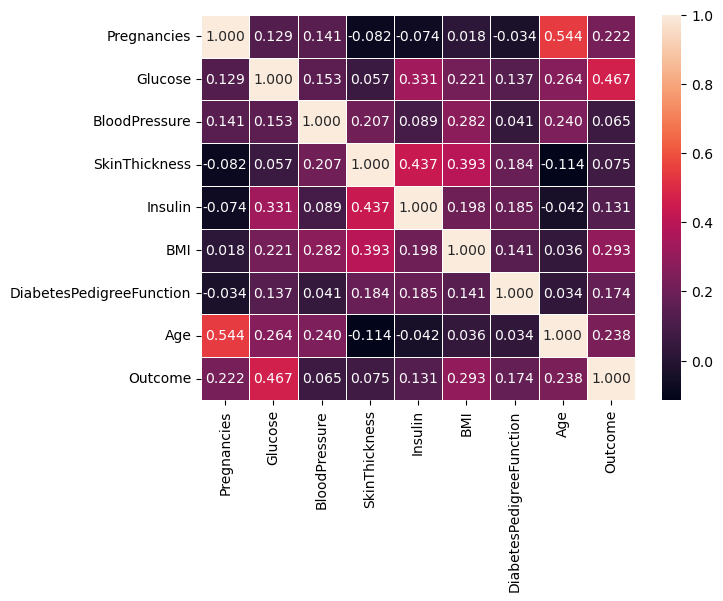

In [7]:
plt.subplots(figsize = (7,5))
cor = df.corr()
sns.heatmap(cor,annot= True,fmt= ".3f",linewidth= 0.45,linecolor='white')
plt.show()

In [8]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [9]:
df['Outcome'].value_counts(normalize= True)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

<Axes: >

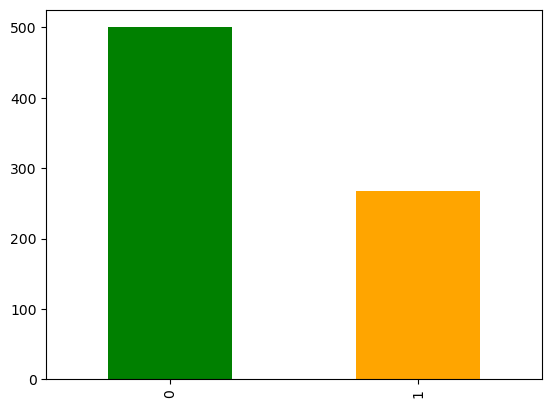

In [10]:
df['Outcome'].value_counts().plot(kind='bar',color=['green', 'orange'])

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

| Variable                 | Skewness | Skew Type    |
|--------------------------|----------|--------------|
| Pregnancies              | 0.90     | Right-skewed |
| Glucose                  | 0.173    | Right-skewed |
| BloodPressure            | -1.84    | Left-skewed  |
| SkinThickness            | 0.109    | Right-skewed |
| Insulin                  | 2.267    | Right-skewed |
| BMI                      | -0.42    | Left-skewed |
| DiabetesPedigreeFunction | 1.920    | Right-skewed |
| Age                      | 1.129    | Right-skewed |



**Skewness of "Pregnancies" Variable:**

A skewness value of 0.90 suggests a positively skewed distribution for the "Pregnancies" variable. This indicates that most individuals in the dataset have a lower number of pregnancies, with a tail extending towards higher values.


0.9016739791518588


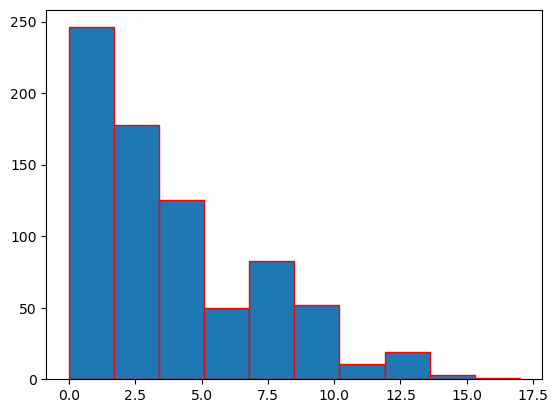

In [12]:
print(df['Pregnancies'].skew())
plt.hist(df['Pregnancies'],edgecolor='red')
plt.show()

**Glucose Variable Skewness:**

A skewness of 0.173 indicates a right-skewed distribution for the "Glucose" variable, meaning that most individuals have glucose levels lower than the mean, with a tail extending towards higher values.


0.17375350179188992


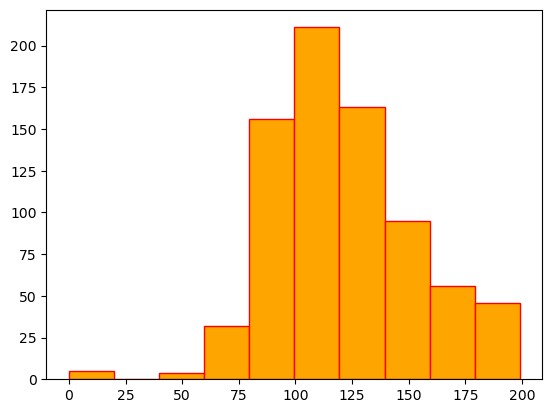

In [13]:
print(df['Glucose'].skew())
plt.hist(df['Glucose'],edgecolor='red',color ='orange')
plt.show()

-1.8436079833551302


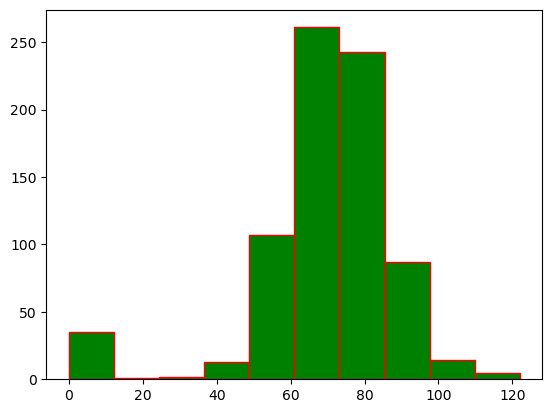

In [14]:
print(df['BloodPressure'].skew())
plt.hist(df['BloodPressure'],edgecolor='red',color='green')
plt.show()

0.10937249648187608


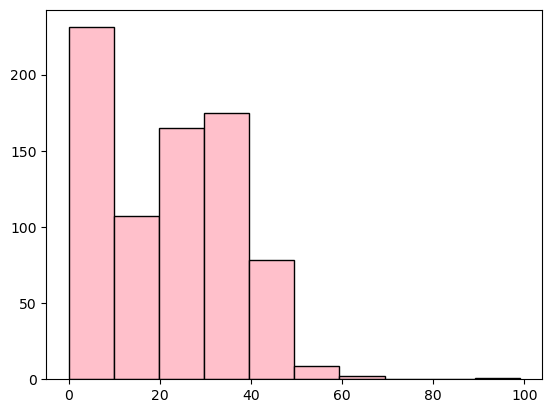

In [15]:
print(df['SkinThickness'].skew())
plt.hist(df['SkinThickness'],edgecolor='black',color='pink')
plt.show()

2.272250858431574


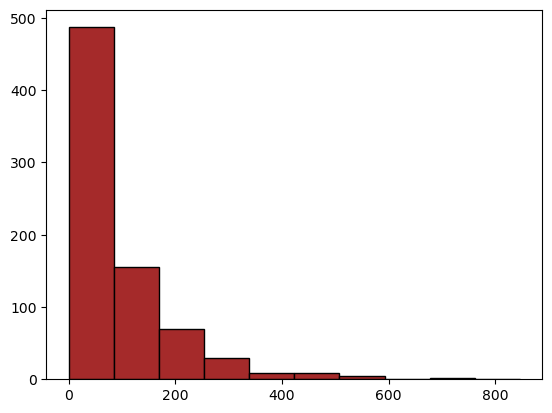

In [16]:
print(df['Insulin'].skew())
plt.hist(df['Insulin'],edgecolor='black',color='brown')
plt.show()

-0.42898158845356543


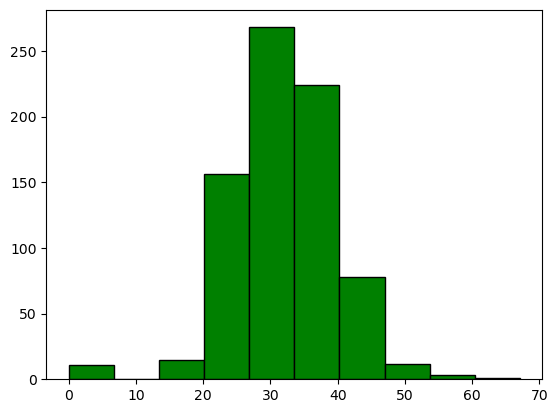

In [17]:
print(df['BMI'].skew())
plt.hist(df['BMI'],edgecolor='black',color='green')
plt.show()

1.919911066307204


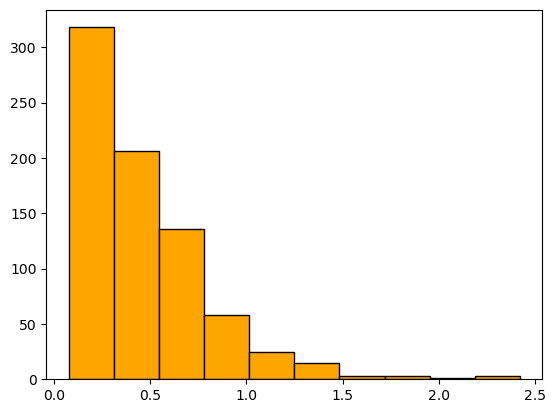

In [18]:
print(df['DiabetesPedigreeFunction'].skew())
plt.hist(df['DiabetesPedigreeFunction'],edgecolor='black',color='orange')
plt.show()

1.1295967011444805


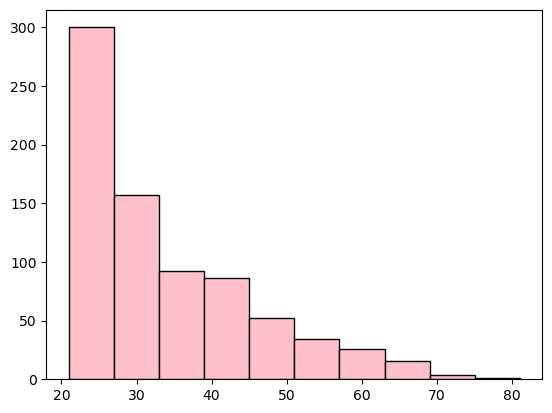

In [19]:
print(df['Age'].skew())
plt.hist(df['Age'],edgecolor='black',color='pink')
plt.show()

In [20]:
df.shape

(768, 9)

In [21]:
df.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
612,7,168,88,42,321,38.2,0.787,40,1
353,1,90,62,12,43,27.2,0.580,24,0
328,2,102,86,36,120,45.5,0.127,23,1
16,0,118,84,47,230,45.8,0.551,31,1
557,8,110,76,0,0,27.8,0.237,58,0
127,1,118,58,36,94,33.3,0.261,23,0
608,0,152,82,39,272,41.5,0.270,27,0
764,2,122,70,27,0,36.8,0.340,27,0
152,9,156,86,28,155,34.3,1.189,42,1
256,3,111,56,39,0,30.1,0.557,30,0


## Bar Plot: Distribution of Pregnancies
Description: This bar plot illustrates the distribution of the "Pregnancies" variable in the dataset. It shows the frequency of different pregnancy counts among the individuals.


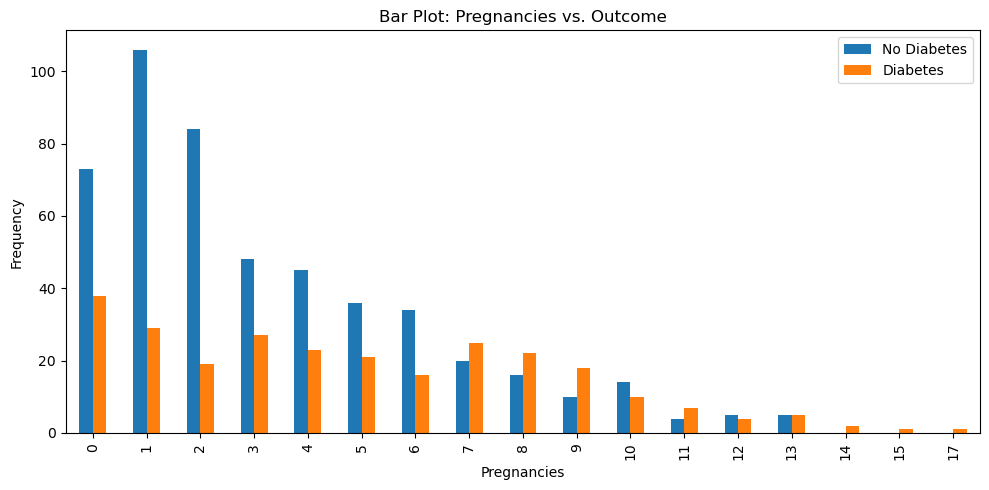

In [22]:
# Create a larger figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Create the plot
pd.crosstab(df['Pregnancies'], df['Outcome']).plot(kind='bar', ax=ax)

# Add title and labels
plt.title('Bar Plot: Pregnancies vs. Outcome')
plt.xlabel('Pregnancies')
plt.ylabel('Frequency')
plt.legend(['No Diabetes', 'Diabetes'])

plt.tight_layout()  # Adjust spacing for better appearance
plt.show()

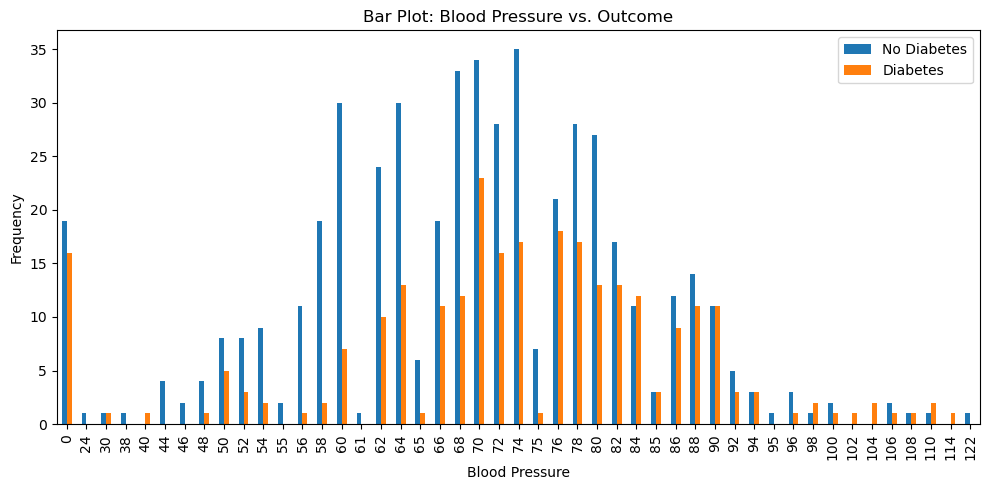

In [23]:
# Create a larger figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Create the plot
pd.crosstab(df['BloodPressure'], df['Outcome']).plot(kind='bar', ax=ax)
plt.title('Bar Plot: Blood Pressure vs. Outcome')
plt.xlabel('Blood Pressure')
plt.ylabel('Frequency')
plt.legend(['No Diabetes', 'Diabetes'])
plt.tight_layout()  # Adjust spacing for better appearance
plt.show()

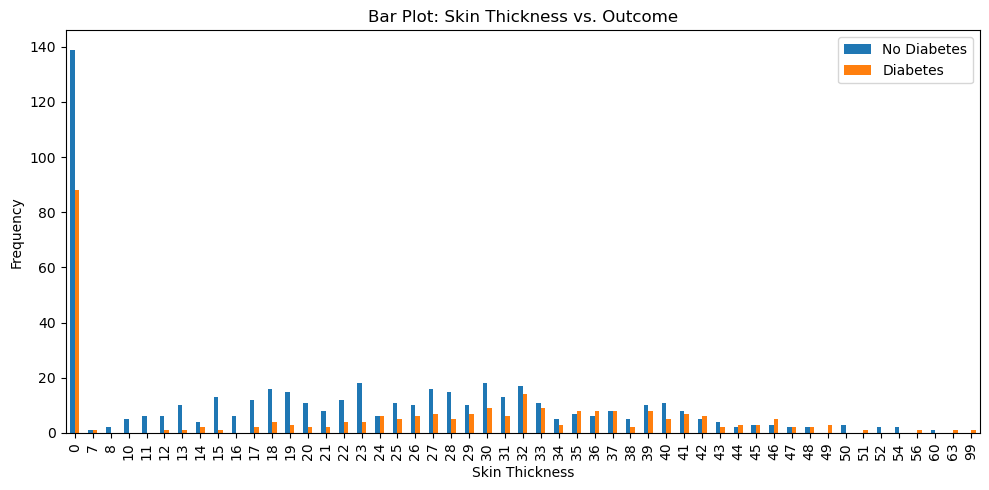

In [24]:
# Create a larger figure and axis
fig, ax = plt.subplots(figsize=(10, 5))
pd.crosstab(df['SkinThickness'],df['Outcome']).plot(kind='bar',ax=ax)
# Add title and labels
plt.title('Bar Plot: Skin Thickness vs. Outcome')
plt.xlabel('Skin Thickness')
plt.ylabel('Frequency')
plt.legend(['No Diabetes', 'Diabetes'])

plt.tight_layout()  # Adjust spacing for better appearance
plt.show()

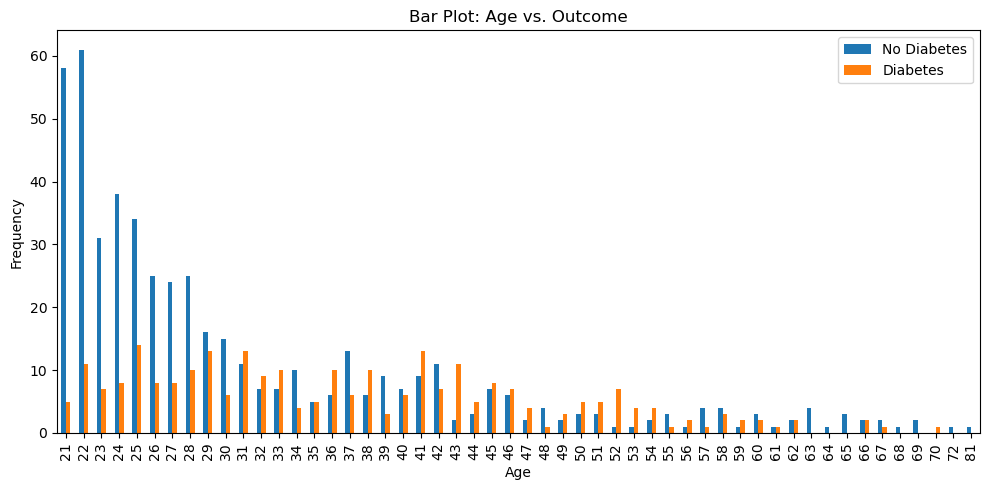

In [25]:
# Create a larger figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Create the bar plot
pd.crosstab(df['Age'], df['Outcome']).plot(kind='bar', ax=ax)

# Add title and labels
plt.title('Bar Plot: Age vs. Outcome')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(['No Diabetes', 'Diabetes'])

plt.tight_layout()  # Adjust spacing for better appearance
plt.show()

In [26]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

## **Outlier Values**

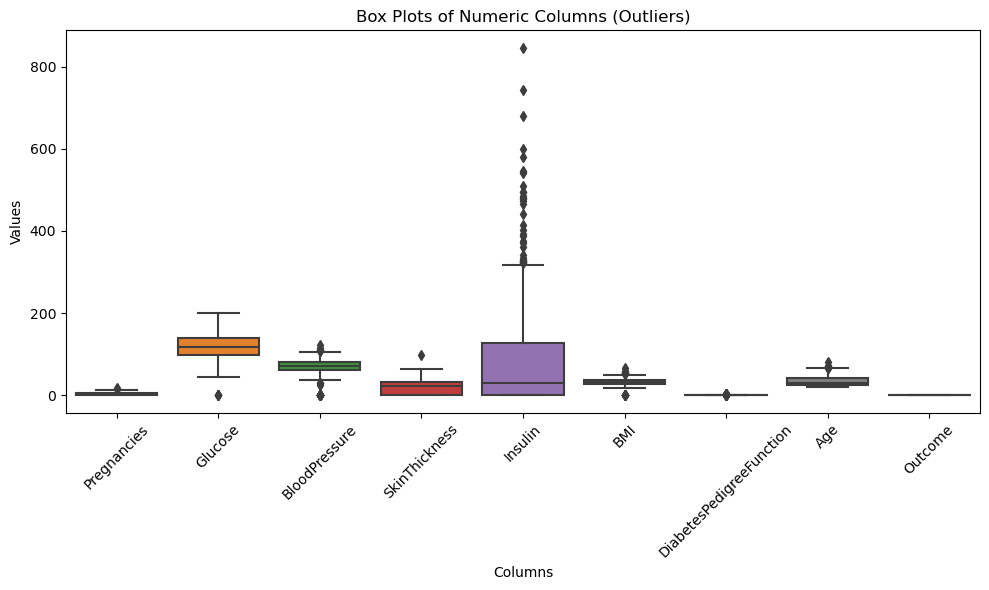

In [27]:
# Select only the numeric columns from the dataset
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Create a larger figure and axis
plt.figure(figsize=(10, 6))

# Create box plots for each numeric column
sns.boxplot(data=numeric_columns)

# Add title and labels
plt.title('Box Plots of Numeric Columns (Outliers)')
plt.xlabel('Columns')
plt.ylabel('Values')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust spacing for better appearance
plt.show()


In [28]:
df.shape

(768, 9)

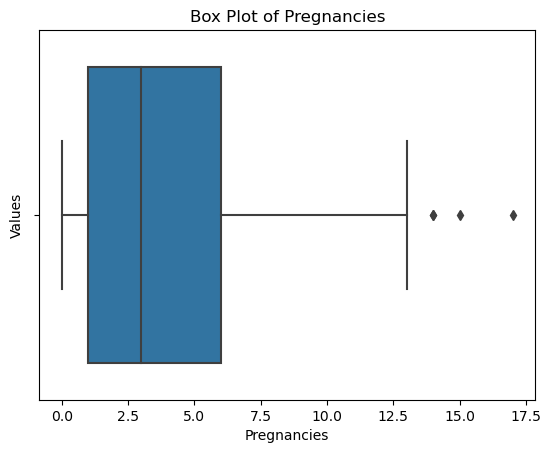

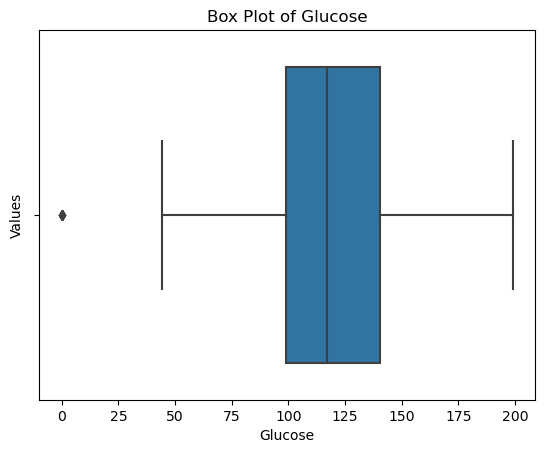

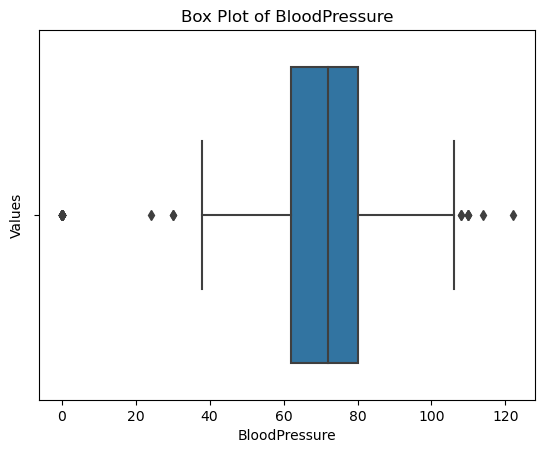

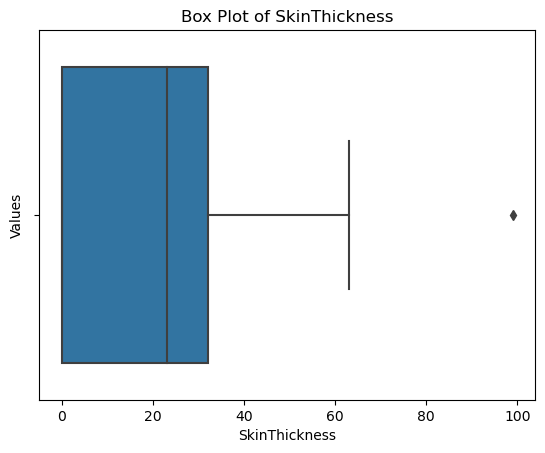

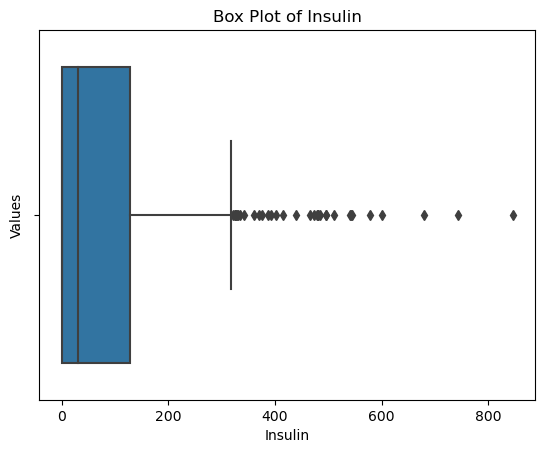

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

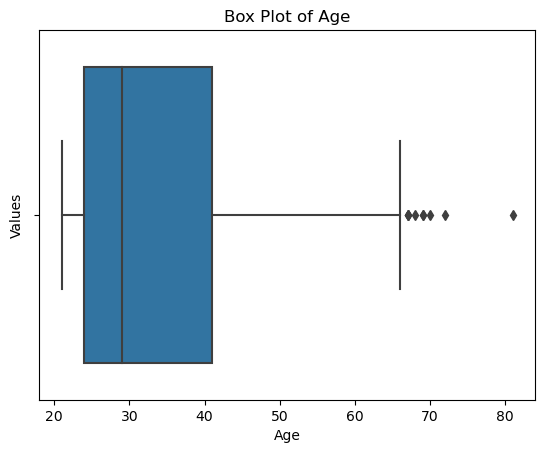

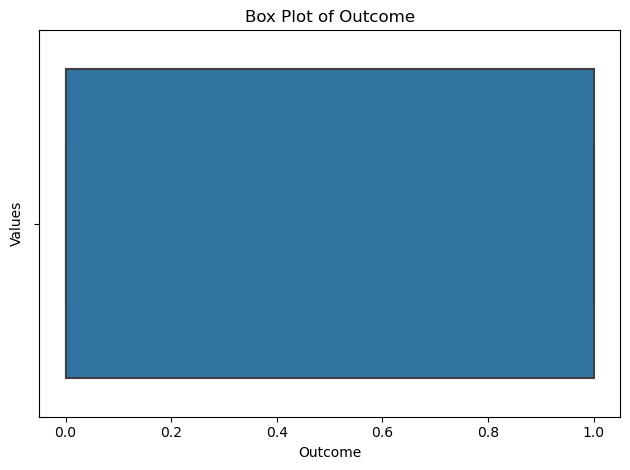

In [29]:
for i in df.columns:
    plt.figure()
    if df[i].dtype == 'int64':
        sns.boxplot(data=df, x=i, orient='h')
        plt.title(f'Box Plot of {i}')
        plt.xlabel(i)
        plt.ylabel('Values')

plt.tight_layout()
plt.show()

In [30]:
df.shape

(768, 9)

In [31]:
# Select numeric columns
numeric_col = df.select_dtypes(['int64','float64'])

# Calculate IQR for each numeric column
Q1 = numeric_col.quantile(0.25)
Q3 = numeric_col.quantile(0.75)
IQR = Q3-Q1

# Define the threshold for outlier detection
threshold = 1.5
# Identify and remove outliers
 
#  .any(axis=1): This checks if any of the numbers in each row are potential outliers.
# ~: This symbol flips things. So, now we have rows where no numbers are outliers   
remove_outliers = df[~((numeric_col<(Q1-threshold*IQR))|(numeric_col>(Q3+threshold*IQR))).any(axis=1)]
# Display the original and cleaned dataset sizes
print("original shape",df.shape)
print("After removes the outliers",remove_outliers.shape)

original shape (768, 9)
After removes the outliers (639, 9)


In [32]:
df = remove_outliers

In [33]:
# Convert the 'Outcome' column to string type
df['Outcome'] = df['Outcome'].astype(str)

## Transform the Dataset
i. Transform the whole dataset (Features)************

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_data = scaler.fit_transform(df)

In [35]:
df.shape

(639, 9)

f. Split the Dataset into train and test set 

In [36]:
# Convert the 'Outcome' column to string type
df['Outcome'] = df['Outcome'].astype(str)

# Perform any necessary data transformations (scaling, etc.)

# Split the data into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (511, 8)
X_test shape (128, 8)
y_train shape (511,)
y_test shape (128,)


## **Logistic regression**

In [38]:
# Create a logistic regression model
logreg_model = LogisticRegression(random_state=42)

# Train (fit) the model on the training data
logreg_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8046875


## **DecisionTreeClassifier**

In [39]:
# Create a Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_tree = tree_model.predict(X_test)

# Compute the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_tree)

# Print the Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[75 17]
 [18 18]]


## **RandomForestClassifier**

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# Create a Random Forest Classifier
forest_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_forest = forest_model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_forest)
precision = precision_score(y_test, y_pred_forest, pos_label='1')
recall = recall_score(y_test, y_pred_forest, pos_label='1')

# Compute the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_forest)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Print the Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Compute the Classification Report
class_report = classification_report(y_test, y_pred_forest)

# Print the Classification Report
print("Classification Report:")
print(class_report)


Accuracy: 0.8046875
Precision: 0.6896551724137931
Recall: 0.5555555555555556
Confusion Matrix:
[[83  9]
 [16 20]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        92
           1       0.69      0.56      0.62        36

    accuracy                           0.80       128
   macro avg       0.76      0.73      0.74       128
weighted avg       0.80      0.80      0.80       128



## **GradientBoostingClassifier**

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score

# Create a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_gb = gb_model.predict(X_test)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb, pos_label='1')
recall = recall_score(y_test, y_pred_gb, pos_label='1')

# Compute the Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_gb)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Print the Confusion Matrix
print("Confusion Matrix:")
print(conf_matrix)

# Compute the Classification Report
class_report = classification_report(y_test, y_pred_gb)

# Print the Classification Report
print("Classification Report:")
print(class_report)


Accuracy: 0.8515625
Precision: 0.7741935483870968
Recall: 0.6666666666666666
Confusion Matrix:
[[85  7]
 [12 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        92
           1       0.77      0.67      0.72        36

    accuracy                           0.85       128
   macro avg       0.83      0.80      0.81       128
weighted avg       0.85      0.85      0.85       128

